In [1]:
%matplotlib inline

In [2]:
import os
os.chdir('/Users/albert/ndreg')

In [3]:
from ndreg import *
import matplotlib
import ndio.remote.neurodata as neurodata
import nibabel as nb

In [23]:
inToken = "Control258"

nd = neurodata()
print(nd.get_metadata(inToken)['dataset']['voxelres'].keys())

[u'1', u'0', u'3', u'2', u'5', u'4']


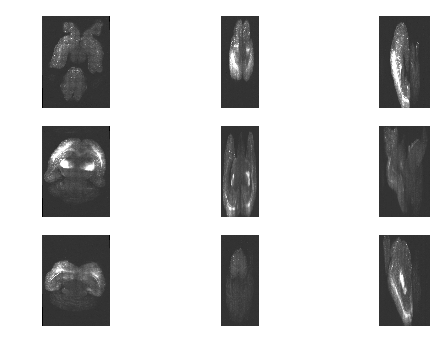

In [24]:
inImg = imgDownload(inToken, resolution=5)
imgShow(inImg, vmax=500)

In [25]:
print(inImg.GetSpacing())

(3.2e-05, 3.2e-05, 9.999999999999999e-06)


In [26]:
refToken = "ara_ccf2"
refImg = imgDownload(refToken)

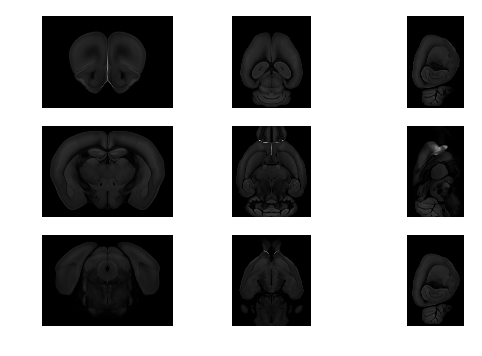

In [27]:
imgShow(refImg)

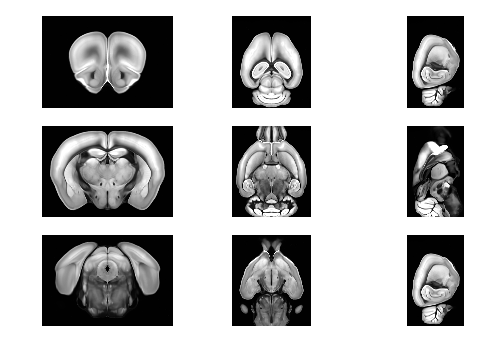

In [28]:
imgShow(refImg, vmax=500)

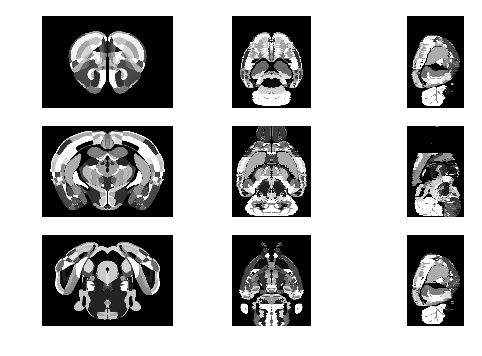

In [29]:
refAnnoImg = imgDownload(refToken, channel="annotation")
imgShow(refAnnoImg, vmax=1000)

In [30]:
randValues = np.random.rand(1000,3)

In [31]:
randValues = np.concatenate(([[0,0,0]],randValues))

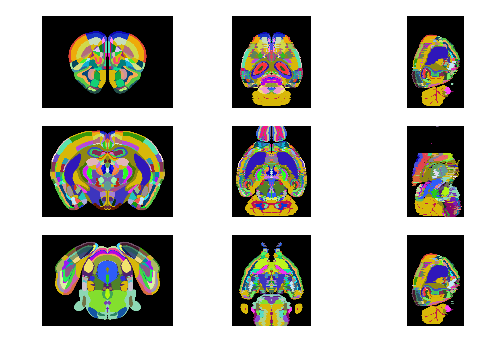

In [32]:
randCmap = matplotlib.colors.ListedColormap (randValues)
imgShow(refAnnoImg, vmax=1000, cmap=randCmap)

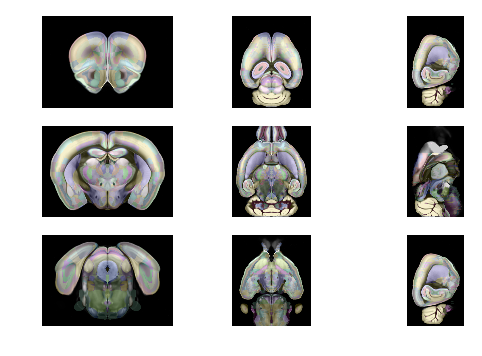

In [33]:
imgShow(refImg, vmax=500, newFig=False)
imgShow(refAnnoImg, vmax=1000, cmap=randCmap, alpha=0.2, newFig=False)
plt.show()

In [34]:
print(inImg.GetSpacing())
print(refImg.GetSpacing())

(3.2e-05, 3.2e-05, 9.999999999999999e-06)
(0.024999999999999998, 0.024999999999999998, 0.024999999999999998)


In [36]:
inImg.SetSpacing([0.01872, 0.01872, 0.005])

In [37]:
print(inImg.GetSpacing())
print(refImg.GetSpacing())

(0.01872, 0.01872, 0.005)
(0.024999999999999998, 0.024999999999999998, 0.024999999999999998)


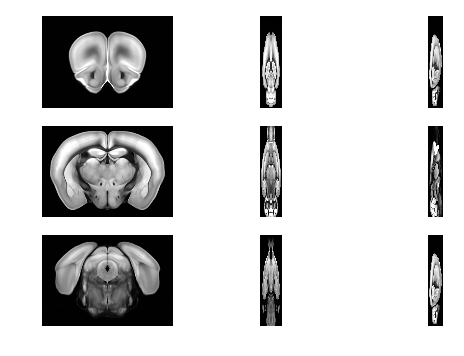

In [38]:
refImg = imgResample(refImg, spacing=inImg.GetSpacing())
imgShow(refImg, vmax=500)

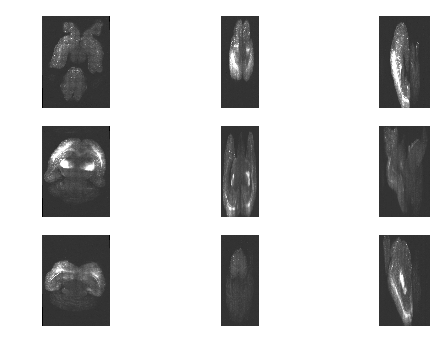

In [39]:
imgShow(inImg, vmax=500)

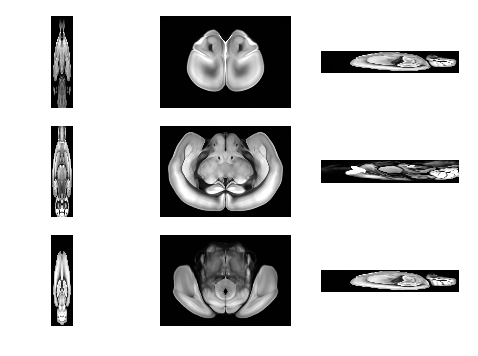

In [40]:
refImg = imgReorient(refImg, "RSA", "LAI")
imgShow(refImg, vmax=500)

In [ ]:
(values, bins) = np.histogram(sitk.GetArrayFromImage(refImg), bins=100, range=(0,500))
plt.plot(bins[:-1], values)

In [ ]:
lowerThreshold = 100
upperThreshold = sitk.GetArrayFromImage(inImg).max()+1

refImg = sitk.Threshold(refImg,lowerThreshold,upperThreshold,lowerThreshold) - lowerThreshold
imgShow(inImg, vmax = 500) 

In [ ]:
(values, bins) = np.histogram(sitk.GetArrayFromImage(refImg), bins=100, range=(0,500))
plt.plot(bins[:-1], values)

In [ ]:
affine = imgAffineComposite(refImg, inImg, iterations=100, useMI=True, verbose=True)

In [ ]:
refImg_affine = imgApplyAffine(refImg, affine, size=inImg.GetSize())
imgShow(inImg_affine, vmax=500)

In [ ]:
refImg = imgResample(refImg_affine, spacing=inImg.GetSpacing())
(field, invField) = imgMetamorphosisComposite(refImg, inImg, alphaList=[0.05, 0.02, 0.01], useMI=True, iterations=100, verbose=True)
refImg_lddmm = imgApplyField(refImg_affine, field, size=inImg.GetSize())
imgShow(inImg_lddmm, vmax = 500)